In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit

# The following lines make plots in dark mode look reasonable.  If you are not using dark
# mode you don't need them, but you can also just leave them here, but you will need to set
# dark_mode = False

dark_mode = True
# plotting choices for dark-mode
if (dark_mode):
    from jupyterthemes import jtplot
    jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
    linecolor = 'w'
else:
    linecolor = 'k'

In [2]:
# create some fake data

npts = 11
xlow = 0.5
xhigh = 5.5

xi = np.linspace(xlow,xhigh,npts)
yrandom = stats.norm.rvs(size=npts,loc=0,scale=.2) # Add some "noise" to the data

# The "equation" that we will fit is the line y=x.  Thus, we expect,
# in all cases, a slope of 1 and a y-intercept of 0.

yi = xi + yrandom

# Create an array of uncertainties in y that increase with increasing x
xl = xlow + 0.1
sigmai = np.array([0.1 + 0.25*(xi[i]-xl) for i in range(npts)])

Text(0.5, 1.0, 'Fake Data with Increasing Uncertainties')

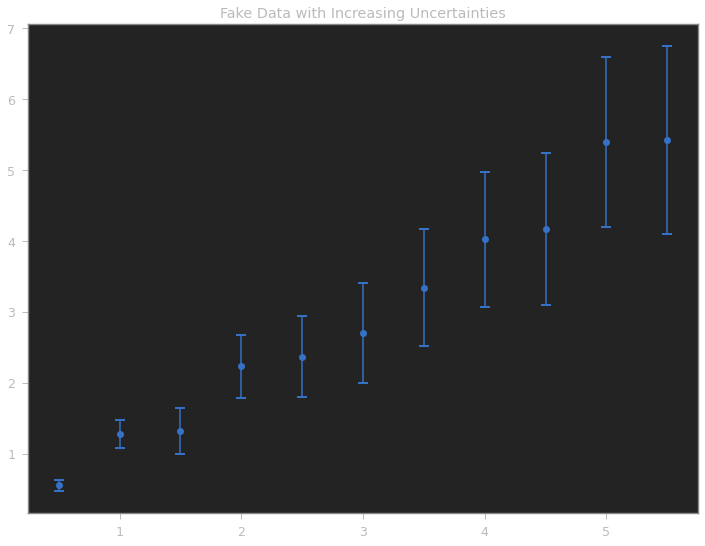

In [3]:
# Let's plot this data, just to see what it looks like

plt.rcParams["figure.figsize"] = (12,9)

figure, axis = plt.subplots(1, 1)
plot1 = plt.subplot2grid((1, 1), (0, 0), rowspan=1, colspan=1)

plot1.errorbar(xi, yi, yerr=sigmai, fmt='o', capsize=5, capthick=2)
plot1.set_title("Fake Data with Increasing Uncertainties")

In [4]:
# So, to fit this data using curve_fit, we need two things:
#
# 1. A fitting function
# 2. A list of initial guesses for the fit parameters
#

def linearfitfunction(x,*paramlist):
    return paramlist[0]+paramlist[1]*x

init_vals = [0.0 for x in range(2)]

# Now, we are ready to call the curve_fit function
#
# It returns a list of the best fit parameters (popt), and the covariance matrix
# which is a (n x n) square matrix, where n is the number of fit parameters.  The
# diagonal elements of the covariance matrix can be used to calculate uncertainties
# in the parameters!

popt, pcov = curve_fit(linearfitfunction,xi,yi,p0=init_vals,sigma=sigmai)
perr = np.sqrt(np.diag(pcov))

Linear Fit: Coefficients (from curve_fit)
[0.08972528 0.96767834]
Linear Fit: Covariance Matrix (from curve_fit)
[[ 0.00261714 -0.00190748]
 [-0.00190748  0.00252099]]

Linear Fit: Final Result: y = (0.96768 +/- 0.05021) x + (0.08973 +/- 0.05116)



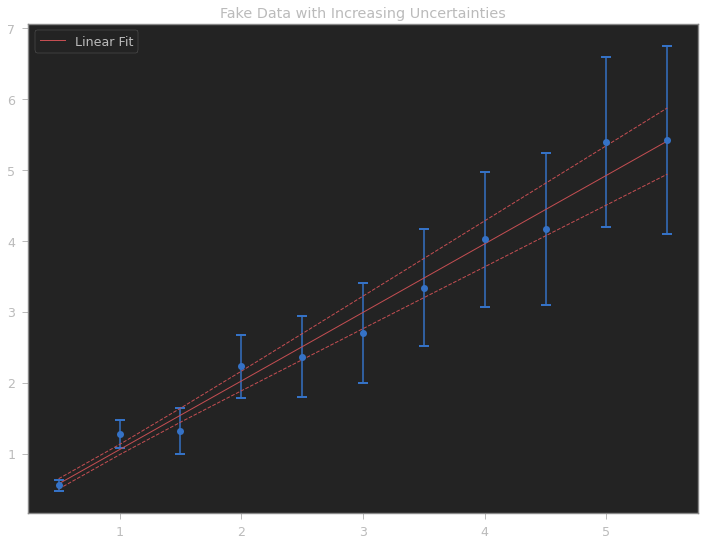

In [5]:
# For plotting purposes, let's do a neat thing to illustrate how the uncertainties in the
# fit parameters affect things.
#
# The idea here is that we will create randomly sample the best fit parameters, using
# the covariance matrix as a constraint, a whole bunch of times (10000 in this case).
# 'ps' will be a 10000 x n 2D matrix, where n is the number of fit parameters.
#
# Then, we create 10000 different fit lines (ysample), using these 10000 different sets
# of fit parameters.
#
# Finally, we choose upper and lower bounds, based on a 95% confidence interval.

ps = np.random.multivariate_normal(popt,pcov,10000)
ysample=np.asarray([linearfitfunction(xi,*pi) for pi in ps])

lower = np.percentile(ysample,2.5,axis=0)
upper = np.percentile(ysample,97.5,axis=0)
middle = (lower+upper)/2.0

print("Linear Fit: Coefficients (from curve_fit)")
print (popt)
print("Linear Fit: Covariance Matrix (from curve_fit)")
print (pcov)

print()
print ("Linear Fit: Final Result: y = (%0.5f +/- %0.5f) x + (%0.5f +/- %0.5f)" % (popt[1],perr[1],popt[0],perr[0]))
print()

plot1.plot(xi,middle,'r-',label="Linear Fit",linewidth=1)
plot1.plot(xi,lower,'r--',linewidth=1)
plot1.plot(xi,upper,'r--',linewidth=1)

plot1.legend()
figure